<a href="https://colab.research.google.com/github/sanjana-ak7/Bioinformatics_lab/blob/main/Bioinfo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Generated OTU Table (First 5 Rows) ---
           Sample_A  Sample_B  Sample_C  Sample_D
Species_1        51        92        14        71
Species_2        60        20        82        86
Species_3        74        74        87        99
Species_4        23         2        21        52
Species_5         1        87        29        37


--- Alpha Diversity (Shannon Index) ---
Sample_A    2.668797
Sample_B    2.855760
Sample_C    2.794169
Sample_D    2.719279
dtype: float64




/tmp/ipython-input-1862811827.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette='viridis')


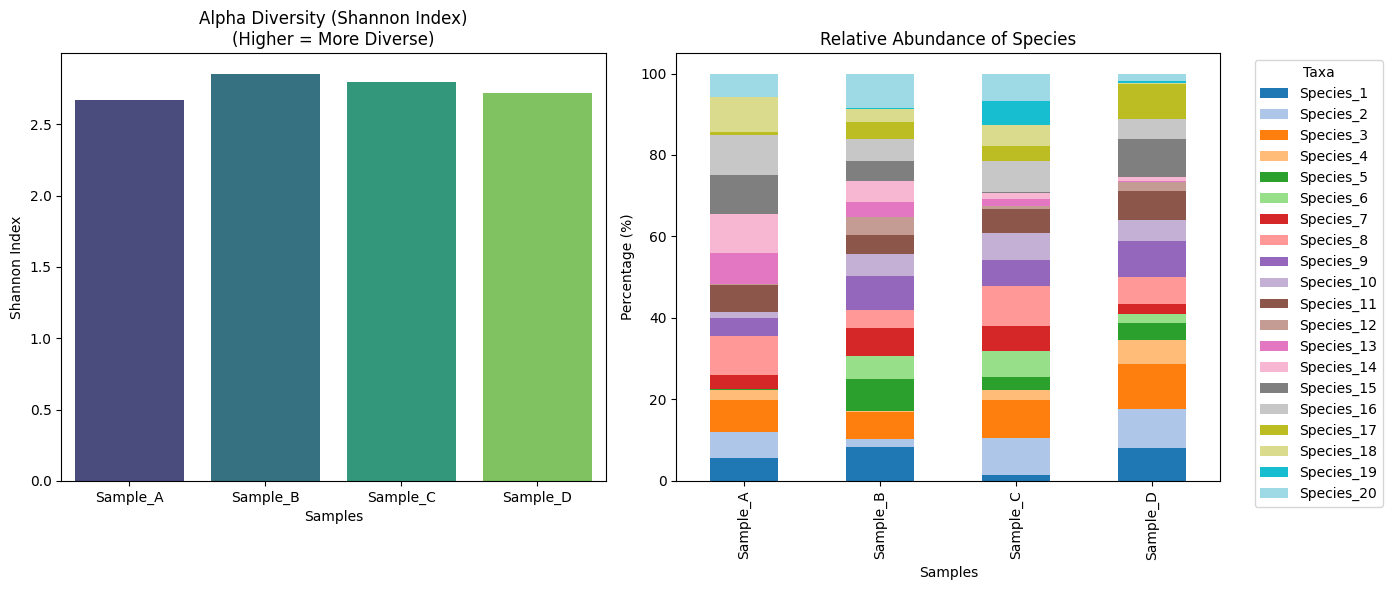

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. Data Simulation (Creating a Mock OTU Table)
# ---------------------------------------------------------
# In a real scenario, this data would come from a CSV file generated
# by a sequencing pipeline (e.g., QIIME2, Mothur).
np.random.seed(42)
taxa = [f"Species_{i}" for i in range(1, 21)] # 10 different species
samples = ['Sample_A', 'Sample_B', 'Sample_C', 'Sample_D'] # 4 samples

# Generate random counts (reads) for each species in each sample
data = np.random.randint(0, 100, size=(20, 4))
df = pd.DataFrame(data, index=taxa, columns=samples)

print("--- Generated OTU Table (First 5 Rows) ---")
print(df.head())
print("\n")

# ---------------------------------------------------------
# 2. Alpha Diversity Analysis (Shannon Index)
# ---------------------------------------------------------
# Formula: H = -sum(p_i * ln(p_i))
def calculate_shannon_index(counts):
    total = sum(counts)
    if total == 0: return 0
    proportions = counts / total
    # Filter out zeros to avoid log(0) error
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

alpha_diversity = df.apply(calculate_shannon_index)

print("--- Alpha Diversity (Shannon Index) ---")
print(alpha_diversity)
print("\n")

# ---------------------------------------------------------
# 3. Relative Abundance Calculation
# ---------------------------------------------------------
# Normalize raw counts to percentages (sum of column = 100%)
relative_abundance = df.div(df.sum(axis=0), axis=1) * 100

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot 1: Alpha Diversity
plt.subplot(1, 2, 1)
sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette='viridis')
plt.title('Alpha Diversity (Shannon Index)\n(Higher = More Diverse)')
plt.ylabel('Shannon Index')
plt.xlabel('Samples')

# Plot 2: Stacked Bar Chart of Relative Abundance
plt.subplot(1, 2, 2)
# We plot the transpose (.T) so samples are on the X-axis
relative_abundance.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Relative Abundance of Species')
plt.ylabel('Percentage (%)')
plt.xlabel('Samples')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Taxa")

plt.tight_layout()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.7 MB/s eta 0:00:00
--- Abundance Table ---
          E. coli  S. aureus  P. aeruginosa  B. subtilis  L. acidophilus
Sample_A       10         50            100            5             200
Sample_B       50         10            120            5             180
Sample_C      200          5             10           50              20
Sample_D       15         80             20          100              10
Sample_E        5        100             30          150               5

--- Alpha Diversity ---
           Shannon  Observed_Species Group
Sample_A  1.113994                 5   Gut
Sample_B  1.143992                 5   Gut
Sample_C  0.928797                 5  Skin
Sample_D  1.262143                 5  Skin
Sample_E  1.082837                 5  Skin

--- Bray-Curtis Di

/usr/local/lib/python3.12/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:275: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.023055060557080856 whereas the largest positive one is 0.5761609098205965.
  warn(


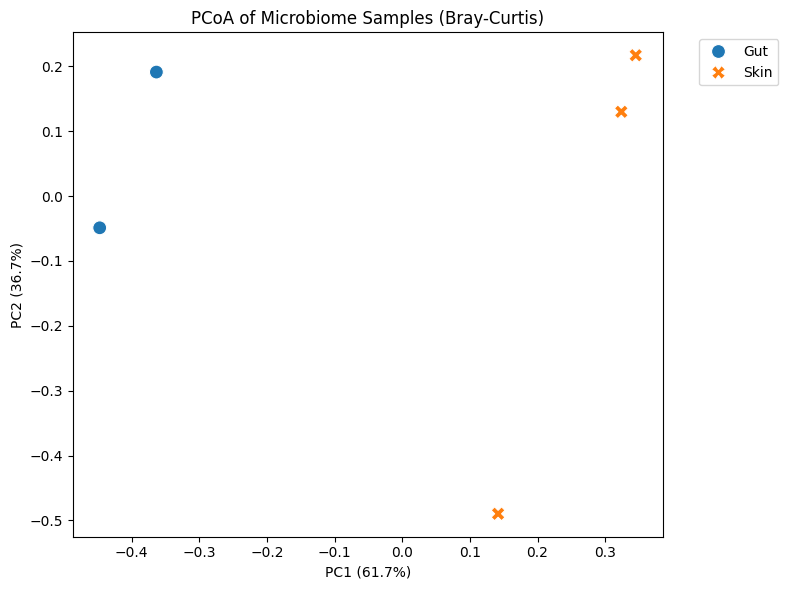

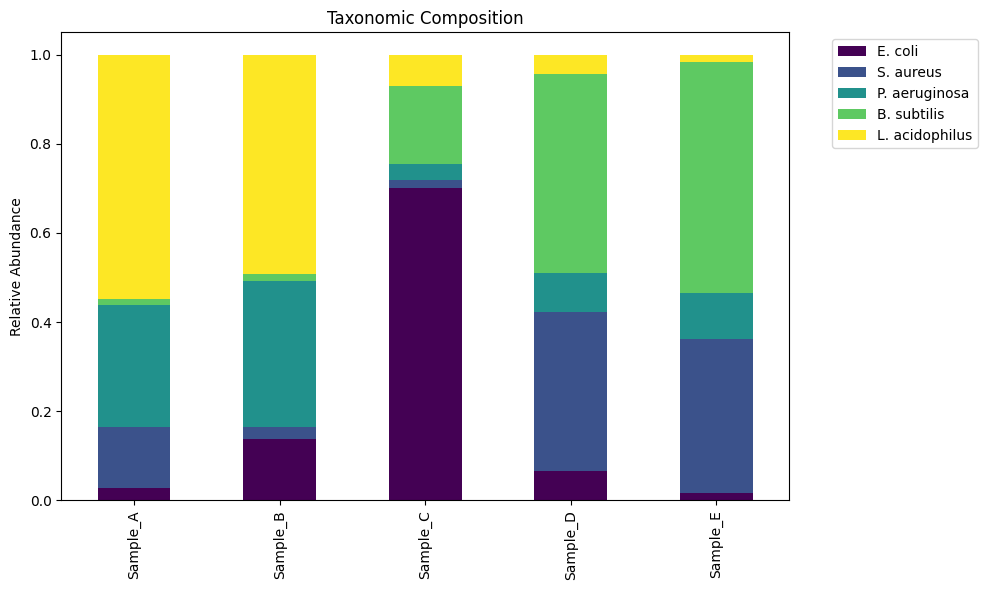

In [ ]:
import subprocess
import os
import glob

# Install scikit-bio if not already installed
!pip install scikit-bio

def run_command(cmd, description):
    """Helper to run shell commands with error handling."""
    print(f"--- Running: {description} ---")
    try:
        # shell=True allows using wildcards like *.fastq
        subprocess.run(cmd, shell=True, check=True)
        print(f"--- Finished: {description} ---\n")
    except subprocess.CalledProcessError as e:
        print(f"!!! Error in {description}: {e}")
        # exit(1) # Commenting out to allow the rest of the cell to run after shell command failure

def pipeline(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    # 1. Quality Control (using fastp)
    # Assumes paired-end reads R1 and R2
    r1_files = sorted(glob.glob(f"{input_dir}/*_R1.fastq.gz"))
    r2_files = sorted(glob.glob(f"{input_dir}/*_R2.fastq.gz"))

    qc_dir = os.path.join(output_dir, "qc_reads")
    os.makedirs(qc_dir, exist_ok=True)

    for r1, r2 in zip(r1_files, r2_files):
        sample_name = os.path.basename(r1).split("_R1")[0]

        qc_cmd = (
            f"fastp -i {r1} -I {r2} "
            f"-o {qc_dir}/{sample_name}_R1_clean.fastq.gz "
            f"-O {qc_dir}/{sample_name}_R2_clean.fastq.gz "
            f"-h {qc_dir}/{sample_name}_fastp.html -j {qc_dir}/{sample_name}_fastp.json"
        )
        run_command(qc_cmd, f"QC for {sample_name}")

    # 2. Assembly (using MEGAHIT)
    # We co-assemble all clean reads for this example
    assembly_out = os.path.join(output_dir, "assembly")
    reads_1 = ",".join(glob.glob(f"{qc_dir}/*_R1_clean.fastq.gz"))
    reads_2 = ",".join(glob.glob(f"{qc_dir}/*_R2_clean.fastq.gz"))

    assemble_cmd = (
        f"megahit -1 {reads_1} -2 {reads_2} "
        f"-o {assembly_out} --out-prefix metagenome_assembly"
    )
    run_command(assemble_cmd, "Metagenome Assembly")

    # 3. Taxonomic Classification (using Kraken2)
    # Note: Requires a pre-built Kraken2 database
    kraken_db = "/path/to/kraken_db"
    taxonomy_out = os.path.join(output_dir, "taxonomy")
    os.makedirs(taxonomy_out, exist_ok=True)

    classify_cmd = (
        f"kraken2 --db {kraken_db} --threads 8 --output {taxonomy_out}/kraken.output "
        f"--report {taxonomy_out}/kraken_report.txt "
        f"{assembly_out}/metagenome_assembly.contigs.fa"
    )
    # run_command(classify_cmd, "Kraken2 Classification") # Uncomment if DB is available

if __name__ == "__main__":
    # Example usage - this pipeline requires raw data files to be present
    # If you have raw data in './raw_data', uncomment the line below.
    # pipeline(input_dir="./raw_data", output_dir="./results")
    pass # Added pass as pipeline call is commented out

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.diversity import alpha_diversity, beta_diversity
from skbio.stats.ordination import pcoa

# 1. Load Data (Creating a mock dataset for demonstration)
# Rows = Samples, Columns = Species (Taxa)
data = {
    'E. coli': [10, 50, 200, 15, 5],
    'S. aureus': [50, 10, 5, 80, 100],
    'P. aeruginosa': [100, 120, 10, 20, 30],
    'B. subtilis': [5, 5, 50, 100, 150],
    'L. acidophilus': [200, 180, 20, 10, 5]
}
sample_ids = ['Sample_A', 'Sample_B', 'Sample_C', 'Sample_D', 'Sample_E']
groups = ['Gut', 'Gut', 'Skin', 'Skin', 'Skin'] # Metadata for coloring

df = pd.DataFrame(data, index=sample_ids)
print("--- Abundance Table ---")
print(df.head())

# 2. Alpha Diversity (Within-sample diversity)
# Metrics: 'shannon', 'simpson', 'chao1'
alpha_shannon = alpha_diversity('shannon', df.values, ids=sample_ids)
alpha_observed = alpha_diversity('observed_features', df.values, ids=sample_ids)

# Combine into a result DataFrame
alpha_results = pd.DataFrame({
    'Shannon': alpha_shannon,
    'Observed_Species': alpha_observed,
    'Group': groups
}, index=sample_ids)

print("\n--- Alpha Diversity ---")
print(alpha_results)

# 3. Beta Diversity (Between-sample diversity)
# Metric: 'braycurtis' is common for abundance data
distance_matrix = beta_diversity('braycurtis', df.values, ids=sample_ids)

print("\n--- Bray-Curtis Distance Matrix ---")
print(distance_matrix)

# 4. PCoA (Principal Coordinates Analysis)
# Dimensionality reduction to visualize the distance matrix
pcoa_results = pcoa(distance_matrix)

# Plotting PCoA
plt.figure(figsize=(8, 6))
pcoa_df = pcoa_results.samples
pcoa_df['Group'] = groups

sns.scatterplot(x='PC1', y='PC2', hue='Group', style='Group', s=100, data=pcoa_df)

# Add percentage explanation to axes
pc1_pct = pcoa_results.proportion_explained['PC1'] * 100
pc2_pct = pcoa_results.proportion_explained['PC2'] * 100
plt.xlabel(f'PC1 ({pc1_pct:.1f}%)')
plt.ylabel(f'PC2 ({pc2_pct:.1f}%)')
plt.title('PCoA of Microbiome Samples (Bray-Curtis)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Taxonomy Bar Plot (Stacked)
# Normalize data to relative abundance (0 to 1)
df_rel = df.div(df.sum(axis=1), axis=0)

df_rel.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.ylabel('Relative Abundance')
plt.title('Taxonomic Composition')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()